In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [2]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [4]:
block_size = 3  
X, Y = [], []
for w in words:
  
  # print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    # print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] 
X = torch.tensor(X)
Y = torch.tensor(Y)

In [5]:
C = torch.randn((27, 2))


In [6]:
X[:3]

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13]])

In [7]:
X[0, 0]

tensor(0)

In [8]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        ...,
        [26, 26, 25],
        [26, 25, 26],
        [25, 26, 24]])

In [9]:
C[X][0, 0]

tensor([-0.1310,  0.4247])

In [10]:
C[0]

tensor([-0.1310,  0.4247])

In [11]:
C[torch.tensor([[0, 0, 0], 
                [0, 9, 5], 
                [0, 5, 13]])]

tensor([[[-0.1310,  0.4247],
         [-0.1310,  0.4247],
         [-0.1310,  0.4247]],

        [[-0.1310,  0.4247],
         [-1.1790,  1.9262],
         [ 0.9083, -0.2426]],

        [[-0.1310,  0.4247],
         [ 0.9083, -0.2426],
         [-0.1238, -0.3968]]])

In [12]:
Dim_1 = F.one_hot(torch.tensor(1, ), num_classes=27).float()
Dim_1 @ C

tensor([-1.9101,  0.4985])

In [13]:
Dim_1.shape

torch.Size([27])

In [14]:
C.shape

torch.Size([27, 2])

In [15]:
X.shape

torch.Size([228146, 3])

In [16]:
C[X].shape

torch.Size([228146, 3, 2])

In [17]:
C[X][5]

tensor([[-0.1310,  0.4247],
        [-0.1310,  0.4247],
        [-0.1310,  0.4247]])

In [18]:
emb = C[X]

In [19]:
(emb[:, 0, :], emb[:, 1, :], emb[:, 2, :])

(tensor([[-0.1310,  0.4247],
         [-0.1310,  0.4247],
         [-0.1310,  0.4247],
         ...,
         [-0.9422, -0.2156],
         [-0.9422, -0.2156],
         [-0.3816, -0.1882]]),
 tensor([[-0.1310,  0.4247],
         [-0.1310,  0.4247],
         [ 0.9083, -0.2426],
         ...,
         [-0.9422, -0.2156],
         [-0.3816, -0.1882],
         [-0.9422, -0.2156]]),
 tensor([[-0.1310,  0.4247],
         [ 0.9083, -0.2426],
         [-0.1238, -0.3968],
         ...,
         [-0.3816, -0.1882],
         [-0.9422, -0.2156],
         [ 0.4185, -0.2664]]))

In [20]:
emb.shape

torch.Size([228146, 3, 2])

In [21]:
W1 = torch.randn((6, 100))
B1 = torch.randn(100)

In [25]:
# h = torch.tanh(emb.view(-1, 6) @ W1 + B1)

In [23]:
h = emb.view(-1, 6) @ W1 + B1

In [28]:
h.shape

torch.Size([228146, 100])

In [ ]:
a = h.view(-1).tolist()

(array([6705748., 1847868.,  973604.,  964501.,  994317.,  916412.,
        1161030., 1265007., 1517062., 6469051.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

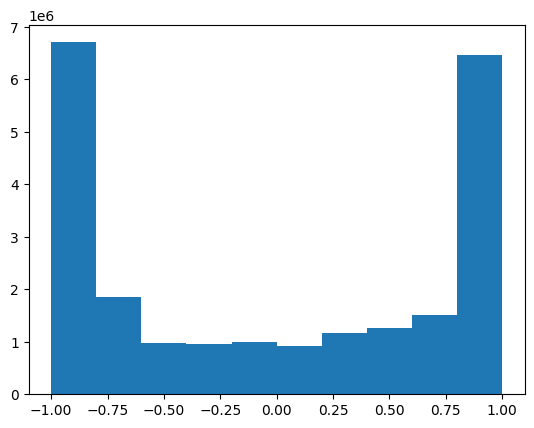

In [35]:
plt.hist(a)

In [ ]:
h = torch.tanh(h)
h.shape

torch.Size([228146, 100])

In [ ]:
W2 = torch.randn((100, 27))
B2 = torch.randn(27)

logits = h @ W2 + B2 

In [ ]:
count = logits.exp()

In [ ]:
prob = count/count.sum(1, keepdim = True)

In [ ]:
X.shape

torch.Size([228146, 3])

In [ ]:
loss =  -prob[torch.arange(228146), Y].log().mean()
loss

tensor(16.6980)

In [ ]:
parameters = sum([parameter.nelement() for parameter in [W1, W2, B1, B2, C]])
parameters

3481

In [ ]:
loss = F.cross_entropy(logits, Y)

In [ ]:
parameters = [parameter for parameter in [W1, W2, B1, B2, C]]

for parameter in parameters:
    parameter.requires_grad = True

In [ ]:
[print(parameter.shape) for parameter in [W1, W2, B1, B2, C]]

torch.Size([6, 100])
torch.Size([100, 27])
torch.Size([100])
torch.Size([27])
torch.Size([27, 2])


[None, None, None, None, None]

In [ ]:
for _ in range(10):
    emb = C[X]
    h = (emb.view(-1, 6) @ W1) + B1
    logits = h @ W2 + B2
    loss = F.cross_entropy(logits, Y)   
    for parameter in parameters:
        parameter.grad = None
    loss.backward()
    for p in parameters:
        p.data += -0.1*p.grad
print(loss.item()) 

11.060368537902832


In [ ]:
for i in range(10):
  ix = torch.randint(0, X.shape[0], (32,))
  emb = C[X[ix]]
  h = torch.tanh(emb.view(-1, 6) @ W1 + B1) 
  logits = h @ W2 + B2 
  loss = F.cross_entropy(logits, Y[ix])
  for p in parameters:
    p.grad = None
  loss.backward()
  for p in parameters:

    print(p.grad)
    p.data += -0.1*p.grad

tensor([[-2.1676e-02, -7.2020e-02, -8.4196e-02, -3.6191e-02,  1.4298e-01,
          3.9428e-03,  9.4107e-03, -1.9283e-02, -5.6823e-02, -1.5848e-02,
         -2.5130e-02, -9.1082e-04, -3.5072e-02, -9.2059e-02,  2.2529e-02,
         -4.2060e-02, -2.5640e-02,  3.8921e-02, -5.4079e-02, -6.7398e-02,
          4.5919e-02, -3.4109e-02,  1.8772e-01, -2.1478e-02,  4.2367e-03,
         -6.1874e-02, -1.1393e-02,  1.0979e-02, -7.5594e-02, -3.5590e-02,
          7.3906e-02,  1.1865e-02,  1.3284e-01,  1.4554e-02,  7.8798e-02,
          6.3087e-02, -2.4463e-02,  2.6725e-02,  3.1075e-02,  6.0384e-02,
          1.1801e-02, -1.3183e-03,  2.1505e-02, -7.5423e-02,  2.3779e-02,
          9.1630e-02, -1.0067e-02, -1.5334e-02,  1.1236e-02, -1.4751e-03,
         -8.6068e-02, -3.6908e-02, -3.2545e-02, -4.0581e-02, -5.2819e-02,
         -9.3923e-03,  5.4804e-02, -1.8772e-02,  1.8418e-02,  2.6504e-02,
          6.0910e-02,  5.0153e-02, -3.0702e-02,  9.1488e-03, -6.3576e-03,
         -3.0420e-02, -1.3408e-02,  9.

In [ ]:
print(loss.item()) 

6.133817195892334


In [ ]:
import random
block_size = 3  
def build_dataset(words):  
  X, Y = [], []
  for w in words: 
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix) 
      context = context[1:] + [ix] 

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [ ]:
g = torch.Generator().manual_seed(2147483647)  
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [ ]:
for p in parameters:
  p.requires_grad = True

In [ ]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [ ]:

lri = []
lossi = []
stepi = []


In [ ]:

for i in range(200000):
  ix = torch.randint(0, Xtr.shape[0], (32,))

  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  
  for p in parameters:
    p.grad = None
  loss.backward()
  
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad
  stepi.append(i)
  lossi.append(loss.log10().item())


KeyboardInterrupt: 

In [ ]:
emb = C[Xtr]  
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)  
logits = h @ W2 + b2  
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1204, grad_fn=<NllLossBackward0>)

In [ ]:
emb = C[Xdev] 
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) 
logits = h @ W2 + b2  
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1603, grad_fn=<NllLossBackward0>)

In [ ]:
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size  
    while True:
      emb = C[torch.tensor([context])] 
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

moha.
mayah.
see.
med.
ryla.
renvrettagrarg.
aderediel.
izemi.
jen.
eden.
estanarielle.
malailin.
shus.
rishiriel.
jenne.
jennex.
berlyn.
brey.
dariyah.
fael.


In [ ]:
a = sum([913, 942, 2237])
print(a/3)

1364.0
